In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
## How the data set looks like

In [3]:
titanic= pd.read_csv("C:/Users/Khsak/Downloads/Titanic_Prediction/tested.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
print(titanic.info())
print(titanic.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None
(418, 12)


In [6]:
## Missing Data and Duplication

In [7]:
print(round((titanic.isna().sum()/len(titanic.index))*100, 2))

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64


In [8]:
titanic.drop(['Cabin'], axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [9]:
age= titanic['Age'].mean()
fare= titanic['Fare'].mean()
titanic = titanic.fillna({'Age' : age , 'Fare' : fare})
titanic['Age'] = titanic['Age'].astype(int)

In [10]:
titanic=titanic.astype({'Age':'int64','Fare':'int64'})

In [11]:
titanic.duplicated().sum()

0

In [12]:
##Checking for outliers

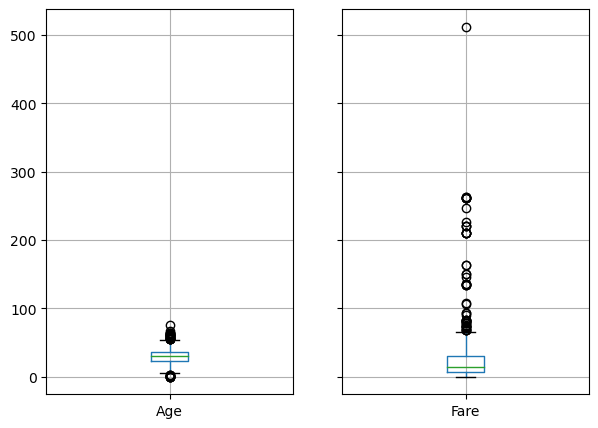

In [13]:
fig, ( ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7,5))
titanic.boxplot('Age', ax=ax1)
titanic.boxplot('Fare', ax=ax2)
plt.show()

In [14]:
def outliers(df, feature):
    Q1, Q3 = df[feature].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    return df.index[(df[feature] < Q1 - 1.5 * IQR) | (df[feature] > Q3 + 1.5 * IQR)]

In [15]:
lst=[]
for ft1 in ['Age']:
    lst.extend(outliers(titanic,ft1))
for ft2 in ['Fare']:
    lst.extend(outliers(titanic,ft2))
titanic = titanic.drop(lst)

In [16]:
titanic[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=0)

,Sex,Survived
0,female,1.0
1,male,0.0


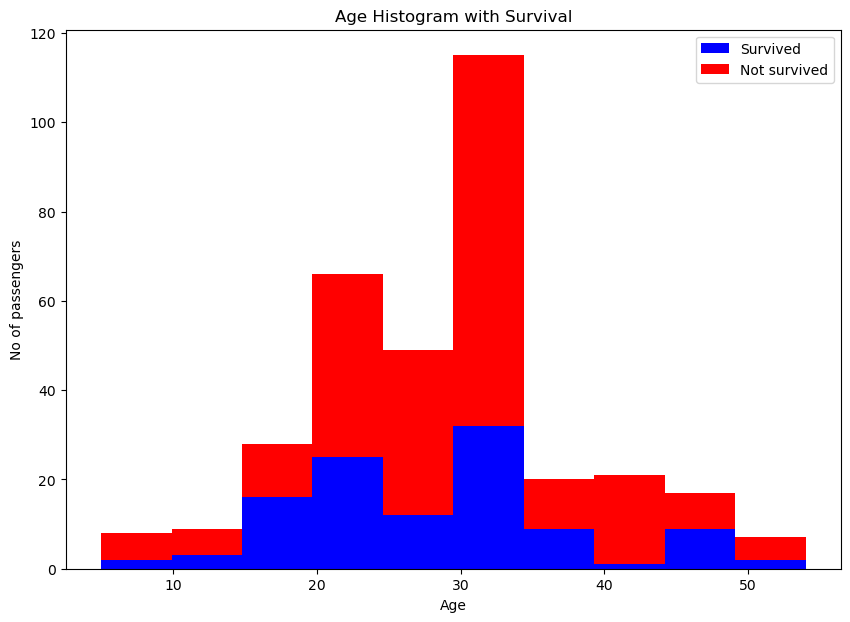

In [17]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [titanic[titanic['Survived']==1]['Age'], titanic[titanic['Survived']==0]['Age']],stacked=True, color = ['b','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

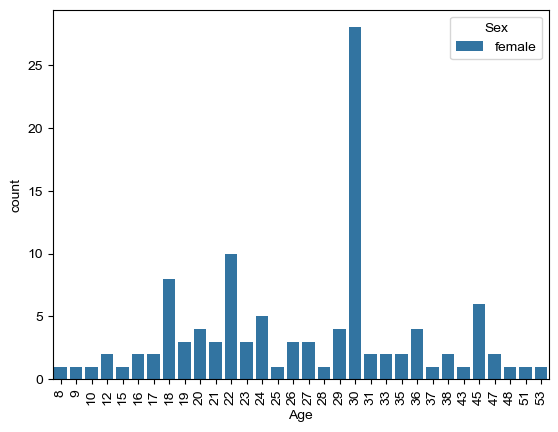

In [18]:
survivals = titanic.loc[titanic.Survived == 1]
sns.countplot(data = survivals, x = 'Age', hue = 'Sex')
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(18,8.27)})
plt.show()

Text(0.5, 1.0, 'survivals according to their class')

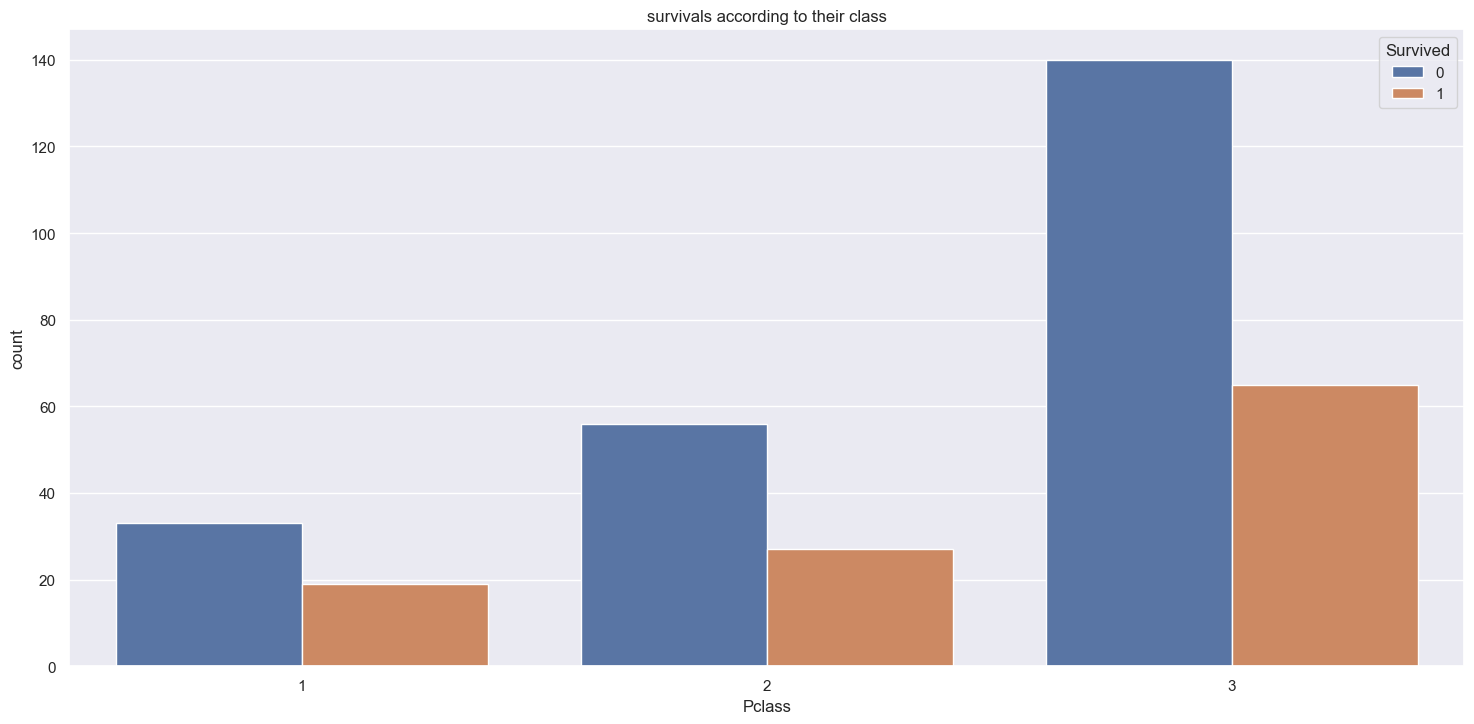

In [19]:
sns.countplot(data = titanic, x = 'Pclass', hue = 'Survived')
sns.set(rc={'figure.figsize':(7,7)})
plt.title('survivals according to their class')

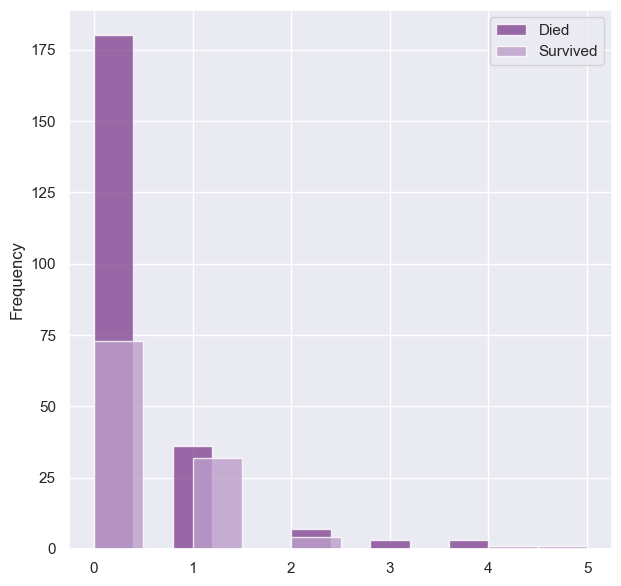

In [20]:
sns.set_palette("PRGn")
titanic.groupby('Survived', as_index=False)['SibSp'].plot.hist(histtype= 'bar',alpha = 0.8)
sns.set(rc={'figure.figsize':(7,8.27)})
plt.legend(('Died','Survived'),)
plt.show()

Text(0.5, 1.0, 'how Families located in different calss could make it')

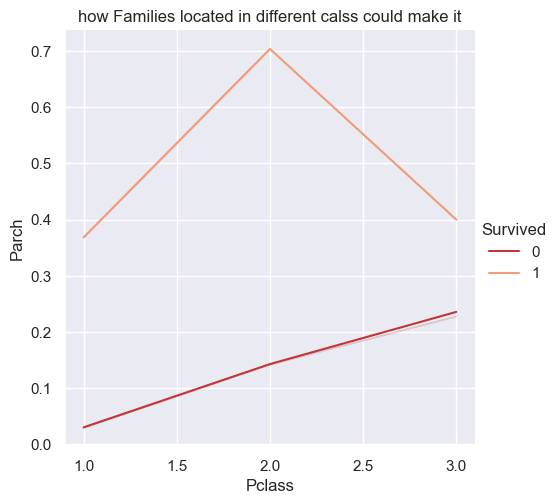

In [21]:
sns.set_palette("RdBu")
sns.relplot(x="Pclass",             
            y="Parch",             
            data=titanic,            
            kind="line",
            hue= 'Survived',
            errorbar=('ci',False)
            )
plt.title('how Families located in different calss could make it')

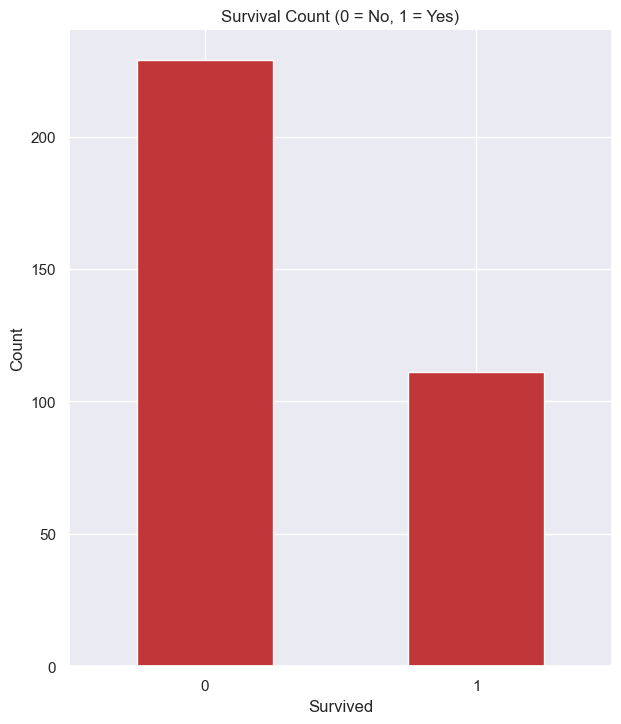

In [22]:
column = 'Survived'
survival_counts = titanic[column].value_counts()
survival_counts.plot(kind='bar', rot=0)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

In [23]:
titanic.drop(columns=['Name','Ticket','PassengerId'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34,0,0,7,Q
1,1,3,female,47,1,0,7,S
3,0,3,male,27,0,0,8,S
4,1,3,female,22,1,1,12,S
5,0,3,male,14,0,0,9,S


In [24]:
titanic['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [25]:
## Convert categorical data to numerical data

In [26]:
titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'Q':1,'C':2}}, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,1
1,1,3,1,47,1,0,7,0
3,0,3,0,27,0,0,8,0
4,1,3,1,22,1,1,12,0
5,0,3,0,14,0,0,9,0


In [27]:
## Model building

In [28]:
Train = titanic.drop(columns=['Survived'], axis=1)
Test = titanic.iloc[:,1]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 2)

In [30]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 88.24%


In [31]:
new_passenger_data = pd.DataFrame({
    'Pclass': [3],   
    'Sex': [0],     
    'Age': [25],    
    'SibSp': [1],   
    'Parch': [0],   
    'Fare': [7],    
    'Embarked': [0] 
})
predicted_survival = LR.predict(new_passenger_data)
if predicted_survival[0] == 0:
    print("The passenger is predicted to not survive.")
else:
    print("The passenger is predicted to survive.")


The passenger is predicted to survive.
